# HW8 Math 189

### By Leah Seseri, Imangali Amangeldi

## Question 1

In [17]:
data <- read.table("Places_Rated.txt", header = FALSE)

# the nine criteria
ratings <- data[, 1:9]

In [23]:
# standardize data so mean is 0 and variance is 1
standardize_data <- scale(ratings)

# covariance matrix
cov_matrix <- cov(standardize_data)

# eigen decomposition
eig <- eigen(cov_matrix)

In [39]:
# eigenvalues
eigenvals <- eig$values
print(eigenvals)

[1] 3.4082918 1.2139762 1.1414791 0.9209178 0.7532849 0.6305619 0.4930477
[8] 0.3180385 0.1204021


In [41]:
# eigenvectors
eigenvectors <- eig$vectors
print(eigenvectors)

            [,1]       [,2]         [,3]        [,4]       [,5]        [,6]
 [1,] -0.2064140  0.2178353  0.689955982  0.13732125 -0.3691499 -0.37460469
 [2,] -0.3565216  0.2506240  0.208172230  0.51182871  0.2334878  0.14163983
 [3,] -0.4602146 -0.2994653  0.007324926  0.01470183 -0.1032405  0.37384804
 [4,] -0.2812984  0.3553423 -0.185104981 -0.53905047 -0.5239397 -0.08092329
 [5,] -0.3511508 -0.1796045 -0.146376283 -0.30290371  0.4043485 -0.46759180
 [6,] -0.2752926 -0.4833821 -0.229702548  0.33541103 -0.2088191 -0.50216981
 [7,] -0.4630545 -0.1947899  0.026484298 -0.10108039 -0.1050976  0.46188072
 [8,] -0.3278879  0.3844746  0.050852640 -0.18980082  0.5295406 -0.08991578
 [9,] -0.1354123  0.4712833 -0.607314475  0.42176994 -0.1596201 -0.03260813
             [,7]        [,8]          [,9]
 [1,]  0.08470577  0.36230833 -0.0013913515
 [2,]  0.23063862 -0.61385513 -0.0136003402
 [3,] -0.01386761  0.18567612  0.7163548935
 [4,] -0.01860646 -0.43002477  0.0586084614
 [5,]  0.58339097  0

In [51]:
# proportion of total variance
prop_var <- eigenvals / sum(eigenvals)

# cumulative proportion of total variance
cum_var <- cumsum(prop_var)

# dataframe for plotting
variance_df <- data.frame(
  PC = 1:9,
  Proportion = prop_var,
  Cumulative = cum_var
)

print(variance_df)

  PC Proportion Cumulative
1  1 0.37869909  0.3786991
2  2 0.13488624  0.5135853
3  3 0.12683102  0.6404163
4  4 0.10232420  0.7427405
5  5 0.08369832  0.8264389
6  6 0.07006243  0.8965013
7  7 0.05478308  0.9512844
8  8 0.03533761  0.9866220
9  9 0.01337801  1.0000000


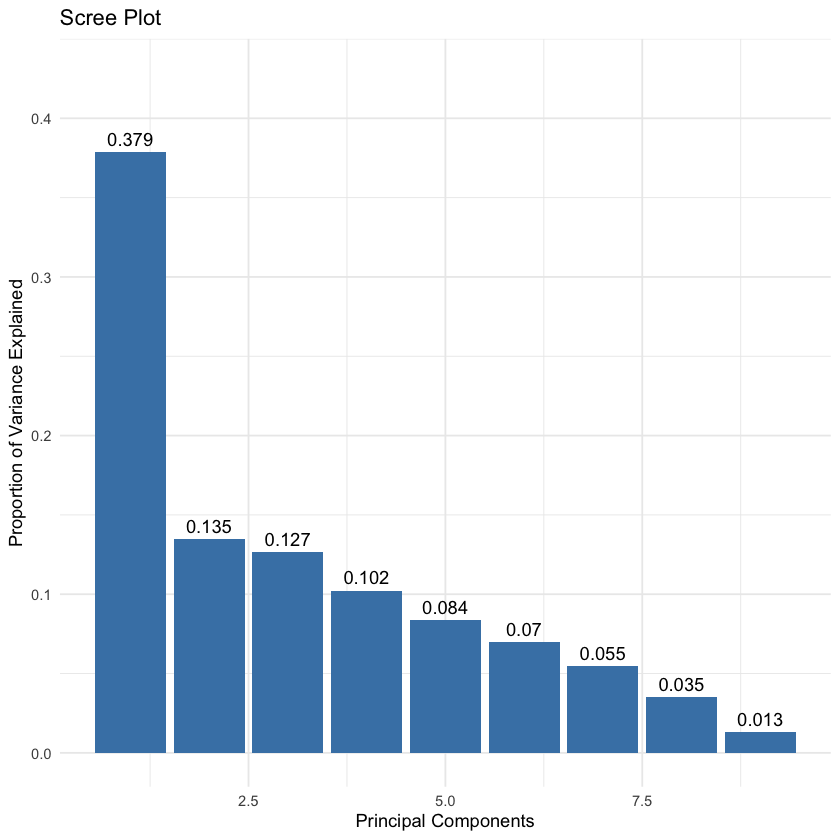

In [53]:
library(ggplot2)

# scree plot
ggplot(variance_df, aes(x = PC, y = Proportion)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = round(Proportion, 3)), vjust = -0.5) +
  ylim(0, max(prop_var) + 0.05) +
  labs(title = "Scree Plot", y = "Proportion of Variance", x = "Principal Components") +
  theme_minimal()

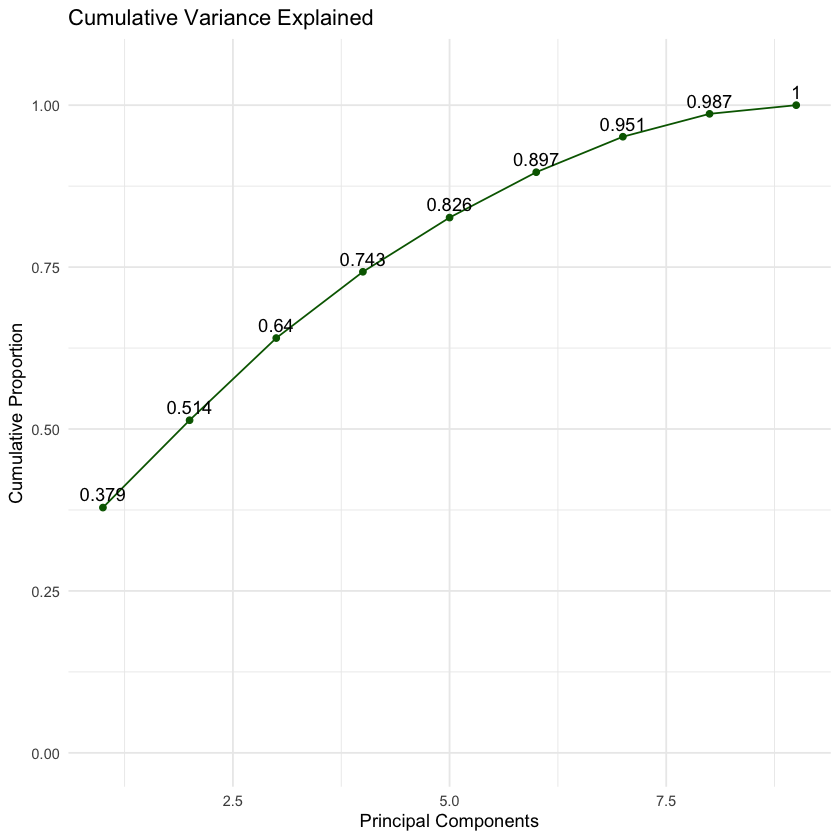

In [55]:
# cumulative plot
ggplot(variance_df, aes(x = PC, y = Cumulative, group = 1)) +
  geom_line(color = "darkgreen") +
  geom_point(color = "darkgreen") +
  geom_text(aes(label = round(Cumulative, 3)), vjust = -0.5) +
  ylim(0, 1.05) +
  labs(title = "Cumulative Variance", y = "Cumulative Proportion", x = "Principal Components") +
  theme_minimal()

In [59]:
# raw data
raw_data <- ratings 

# covariance matrix of raw data
cov_raw <- cov(raw_data)

# eigen decomposition
eig_raw <- eigen(cov_raw)

In [61]:
# raw eigenvalues
eigenvals_raw <- eig_raw$values
print(eigenvals_raw)

[1] 24413668.72  4408004.85  1638039.60  1076355.78   478338.27   240851.80
[7]    92809.94    66995.90    10962.63


In [65]:
# raw eigenvectors
eigenvectors_raw <- eig_raw$vectors
print(eigenvectors_raw)

              [,1]         [,2]         [,3]        [,4]         [,5]
 [1,] -0.006416346  0.015459527 -0.006692298 -0.02631066 -0.016278231
 [2,] -0.269142181  0.937207188 -0.082641934 -0.17775057  0.083842278
 [3,] -0.178318724 -0.020539870  0.027761041 -0.02656157  0.159075722
 [4,] -0.028134276 -0.010901921  0.037610931  0.09903536 -0.116013534
 [5,] -0.149302463  0.018757344  0.971531831 -0.03839697  0.146649668
 [6,] -0.025190912 -0.001395877  0.041507669  0.02163938  0.106255968
 [7,] -0.930859522 -0.282260587 -0.151026851  0.02775471 -0.008673762
 [8,] -0.069824043  0.103848215  0.149571984  0.06903276 -0.954262248
 [9,] -0.025130829  0.173359958  0.012743344  0.97453606  0.102240592
              [,6]        [,7]        [,8]          [,9]
 [1,] -0.001186617 -0.08140848 -0.04213801  0.9951449417
 [2,] -0.048638182 -0.02668780 -0.01211847 -0.0229330011
 [3,]  0.929492918 -0.13706121  0.24135975  0.0013718748
 [4,] -0.053976191 -0.94477955 -0.26682693 -0.0876894940
 [5,] -0.092235

In [67]:
# proportion of total variance
prop_var_raw <- eigenvals_raw / sum(eigenvals_raw)

# cumulative proportion of total variance
cum_var_raw <- cumsum(prop_var_raw)

# dataframe for plotting
variance_df_raw <- data.frame(
  PC = 1:9,
  Proportion = prop_var_raw,
  Cumulative = cum_var_raw
)

print(variance_df_raw)

  PC  Proportion Cumulative
1  1 0.752903473  0.7529035
2  2 0.135940329  0.8888438
3  3 0.050516197  0.9393600
4  4 0.033194192  0.9725542
5  5 0.014751677  0.9873059
6  6 0.007427731  0.9947336
7  7 0.002862205  0.9975958
8  8 0.002066115  0.9996619
9  9 0.000338081  1.0000000


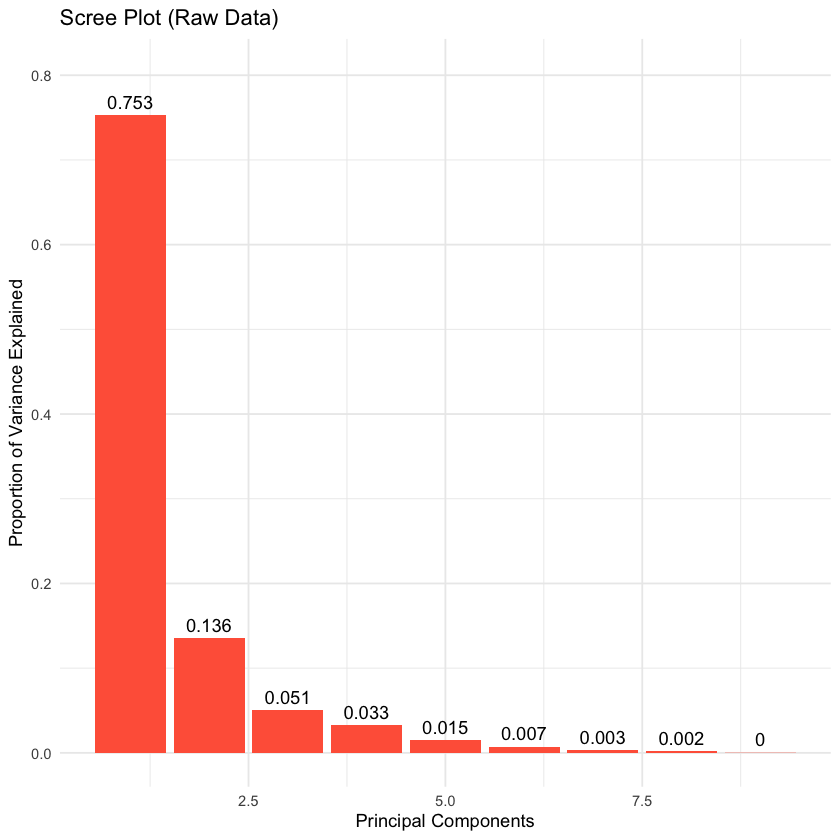

In [71]:
# scree plot for raw data
ggplot(variance_df_raw, aes(x = PC, y = Proportion)) +
  geom_bar(stat = "identity", fill = "tomato") +
  geom_text(aes(label = round(Proportion, 3)), vjust = -0.5) +
  ylim(0, max(prop_var_raw) + 0.05) +
  labs(title = "Scree Plot (Raw Data)", y = "Proportion of Variance", x = "Principal Components") +
  theme_minimal()

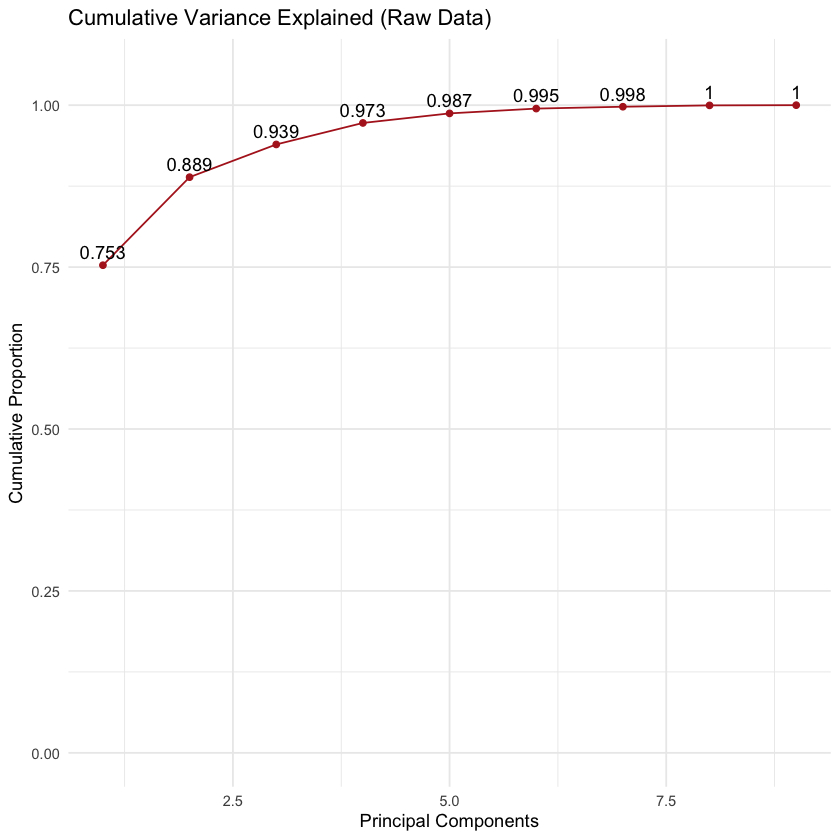

In [73]:
# cumulative plot for raw data
ggplot(variance_df_raw, aes(x = PC, y = Cumulative, group = 1)) +
  geom_line(color = "firebrick") +
  geom_point(color = "firebrick") +
  geom_text(aes(label = round(Cumulative, 3)), vjust = -0.5) +
  ylim(0, 1.05) +
  labs(title = "Cumulative Variance (Raw Data)", y = "Cumulative Proportion", x = "Principal Components") +
  theme_minimal()

The results from the standardized data show a more balanced distribution of variance from all the principle components while in the raw data, the first principle component is way larger than the others due to it being dominated by the variable with the largest variance. Also, the variance for the first principle component is way larger for the raw data than for the standardized data. In the standardized data, no single component dominates which indicates that each variable contributes more equally after removing the influence of scales.

## Question 2